In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
warnings.filterwarnings('ignore')

import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

C:\Users\Trader\anaconda3\envs\iod_dl\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex
C:\Users\Trader\AppData\Local\Temp\ipykernel_7828\2963385244.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
import yfinance as yf
from yahoofinancials import YahooFinancials

In [3]:
apple = yf.download('AAPL', 
                      start='2019-01-01', 
                      end='2021-06-15', 
                      progress=False,
)
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.233902,140014000
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.277531,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.464806,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.936081,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.856094,219111200


In [6]:
apple_close = apple.drop(['Open','High','Low','Adj Close','Volume'],axis=1)

In [7]:
apple_close.tail()

,Close
Date,
2021-06-08,126.739998
2021-06-09,127.129997
2021-06-10,126.110001
2021-06-11,127.349998
2021-06-14,130.479996


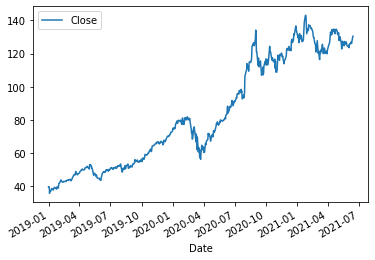

In [8]:
apple_close.plot();

In [9]:
timeseries = apple_close['Close']

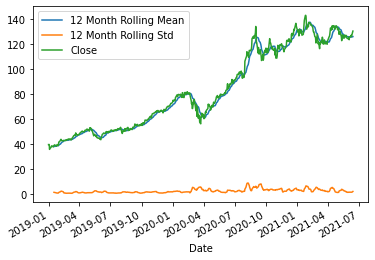

In [10]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

<Figure size 432x288 with 0 Axes>

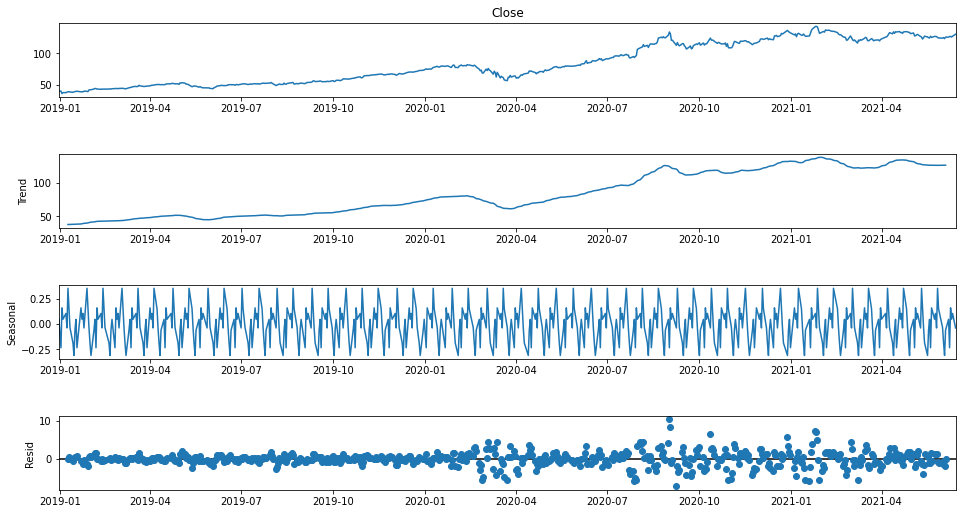

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(apple_close['Close'], period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [12]:
apple_close.head()

,Close
Date,
2018-12-31,39.435001
2019-01-02,39.480000
2019-01-03,35.547501
2019-01-04,37.064999
2019-01-07,36.982498


In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
result = adfuller(apple_close['Close'])

In [15]:
result

(-0.5904242080702279,
 0.8731311159927073,
 1,
 616,
 {'1%': -3.4410103235939746,
  '5%': -2.866243374831338,
  '10%': -2.5692748053002195},
 2532.677934097128)

In [16]:
time_series = apple_close['Close']

In [17]:
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [18]:
adf_check(apple_close['Close'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.5904242080702279
p-value : 0.8731311159927073
#Lags Used : 1
Number of Observations Used : 616
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [20]:
apple_close['First Difference'] = apple_close['Close'] - apple_close['Close'].shift(1)

In [22]:
adf_check(apple_close['First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -10.92458113147452
p-value : 1.0178051608913235e-19
#Lags Used : 17
Number of Observations Used : 598
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [23]:
apple_close['First Difference']

Date
2018-12-31         NaN
2019-01-02         NaN
2019-01-03   -3.977497
2019-01-04    5.449997
2019-01-07   -1.599998
                ...   
2021-06-08    0.829994
2021-06-09   -0.449997
2021-06-10   -1.409996
2021-06-11    2.259995
2021-06-14    1.889999
Name: First Difference, Length: 618, dtype: float64

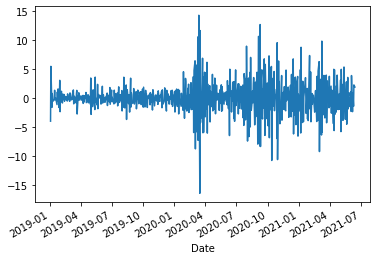

In [24]:
apple_close['First Difference'].plot();

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

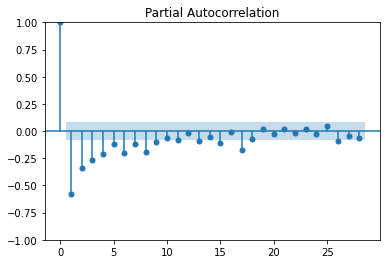

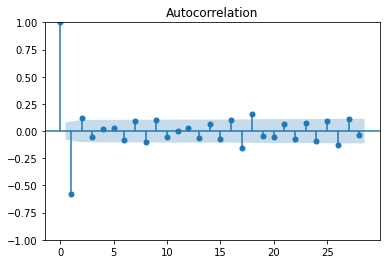

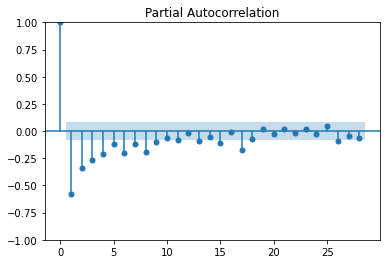

In [26]:
plot_acf(apple_close['First Difference'].dropna())
plot_pacf(apple_close['First Difference'].dropna())

In [31]:
from statsmodels.tsa.arima.model import ARIMA

In [36]:
arima_model = ARIMA(apple_close['Close'],order=(1,1,2))
results = arima_model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  618
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1306.222
Date:                Fri, 08 Apr 2022   AIC                           2620.443
Time:                        17:50:20   BIC                           2638.142
Sample:                             0   HQIC                          2627.324
                                - 618                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3654      0.176     -2.074      0.038      -0.711      -0.020
ma.L1         -0.7679      0.311     -2.472      0.013      -1.377      -0.159
ma.L2         -0.2320      0.196     -1.184      0.2

In [37]:
results.resid

Date
2018-12-31         NaN
2019-01-02    0.044998
2019-01-03   -3.977497
2019-01-04    3.131877
2019-01-07    1.301361
                ...   
2021-06-08    0.599767
2021-06-09    0.363930
2021-06-10   -1.156588
2021-06-11    0.942733
2021-06-14    3.170339
Length: 618, dtype: float64

<AxesSubplot:xlabel='Date'>

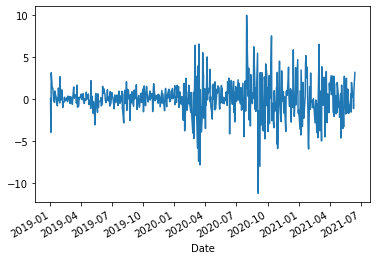

In [38]:
results.resid.plot()

<AxesSubplot:ylabel='Density'>

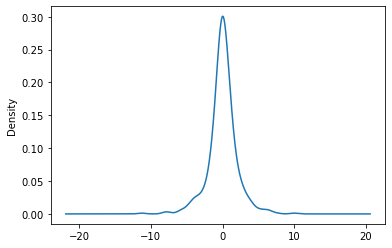

In [39]:
results.resid.plot(kind='kde')

<AxesSubplot:xlabel='Date'>

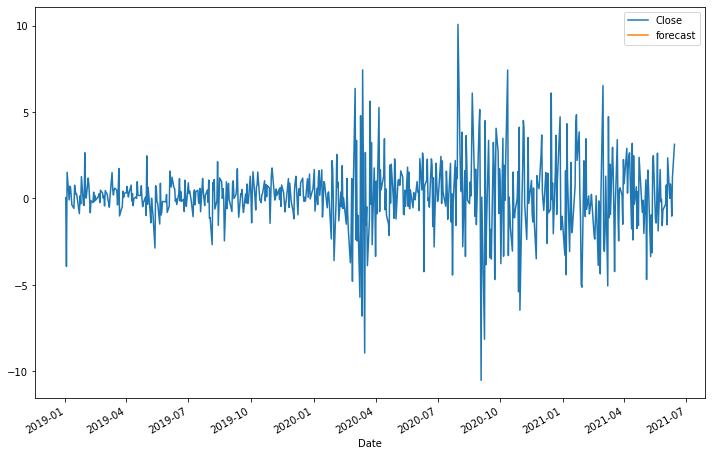

In [41]:
apple_close['forecast'] = results.predict(start = 600, end= 618, dynamic= True)  
apple_close[['Close','forecast']].plot(figsize=(12,8))

In [44]:
apple_close['Close'] = math.exp(apple_close['Close'])

TypeError: cannot convert the series to <class 'float'>